# II.6 Singular Value Decomposition


In this chapter we discuss the _Singular Value Decomposition (SVD)_: a matrix factorisation
that encodes how much a matrix "stretches" a random vector. This includes _singular values_, 
the largest of which dictates the $2$-norm of the matirx.

**Definition 1 (singular value decomposition)** For $A ∈ ℂ^{m × n}$ with rank $r > 0$, 
the _(reduced) singular value decomposition (SVD)_ is
$$
A = U Σ V^⋆
$$
where $U ∈ ℂ^{m × r}$ and $V ∈  ℂ^{r × n}$ have orthonormal columns and $Σ ∈ ℝ^{r × r}$ is  diagonal whose
diagonal entries, which which we call _singular values_, are all positive and non-increasing: $σ_1 ≥ ⋯ ≥ σ_r > 0$.
The _full singular value decomposition (SVD)_ is
$$
A = Ũ Σ̃ Ṽ^⋆
$$
where $Ũ ∈ U(m)$ and $Ṽ ∈  U(n)$ are unitary matrices and $Σ̃ ∈ ℝ^{m × n}$ has only
diagonal non-zero entries, i.e., if $m > n$,
$$
Σ̃ = \begin{bmatrix} σ_1 \\ & ⋱ \\ && σ_n \\ && 0 \\ && ⋮ \\ && 0 \end{bmatrix}
$$
and if $m < n$,
$$
Σ̃ = \begin{bmatrix} σ_1 \\ & ⋱ \\ && σ_m & 0 & ⋯ & 0\end{bmatrix}
$$
where $σ_k = 0$ if $k > r$.

In particular, we discuss:

1. Existence of the SVD: we show that an SVD exists by relating it to the eigenvalue Decomposition of $A^⋆A$ and $AA^⋆$.
2. 2-norm and SVD: the 2-norm of a matrix is defined in terms of the largest singular value.
3. Best rank-$k$ approximation and compression: the best approximation of a matrix by a smaller rank matrix can be constructed
using the SVD, which gives an effective way to compress matrices.

In [1]:
using LinearAlgebra, Plots, Images

## 1. Existence


To show the SVD exists we first establish some properties of a _Gram matrix_ ($A^⋆ A$):

**Proposition 1 (Gram matrix kernel)** The kernel of $A$ is the also the kernel of $A^⋆ A$. 

**Proof**
If $A^⋆ A 𝐱 = 0$ then we have
$$
0 = 𝐱^⋆ A^⋆ A 𝐱 = \| A 𝐱 \|^2
$$
which means $A 𝐱 = 0$ and $𝐱 ∈ \hbox{ker}(A)$.
∎

**Proposition 2 (Gram matrix diagonalisation)** The Gram-matrix
satisfies
$$
A^⋆ A = Q Λ Q^⋆ ∈ ℂ^{n × n}
$$
is a Hermitian matrix where $Q ∈ U(n)$ and the eigenvalues $λ_k$ are real and non-negative.
If $A ∈ ℝ^{m × n}$ then $Q ∈ O(n)$.

**Proof**
$A^⋆ A$ is Hermitian so we appeal to the spectral theorem for the
existence of the decomposition, and the fact that the eigenvalues are real.
For the corresponding (orthonormal) eigenvector $𝐪_k$,
$$
λ_k = λ_k 𝐪_k^⋆ 𝐪_k = 𝐪_k^⋆ A^⋆ A 𝐪_k = \| A 𝐪_k \|^2 ≥ 0.
$$

∎


This connection allows us to prove existence:

**Theorem 1 (SVD existence)** Every $A ∈ ℂ^{m × n}$ has an SVD.

**Proof**
Consider
$$
A^⋆ A = Q Λ Q^⋆.
$$
Assume (as usual) that the eigenvalues are sorted in decreasing modulus, and so $λ_1,…,λ_r$
are an enumeration of the non-zero eigenvalues and
$$
V := \begin{bmatrix} 𝐪_1 | ⋯ | 𝐪_r \end{bmatrix}
$$
the corresponding (orthonormal) eigenvectors, with
$$
K = \begin{bmatrix} 𝐪_{r+1} | ⋯ | 𝐪_n \end{bmatrix}
$$
the corresponding kernel. 
Define
$$
Σ :=  \begin{bmatrix} \sqrt{λ_1} \\ & ⋱ \\ && \sqrt{λ_r} \end{bmatrix}
$$
Now define
$$
U := AV Σ^{-1}
$$
which is orthogonal since $A^⋆ A V = V Σ^2 $:
$$
U^⋆ U = Σ^{-1} V^⋆ A^⋆ A V Σ^{-1} = I.
$$
Thus we have
$$
U Σ V^⋆ = A V V^⋆ = A \underbrace{\begin{bmatrix} V | K \end{bmatrix}}_Q\underbrace{\begin{bmatrix} V^⋆ \\ K^⋆ \end{bmatrix}}_{Q^⋆}
$$
where we use the fact that $A K = 0$ so that concatenating $K$ does not change the value.

∎

## 2. 2-norm and SVD

Singular values tell us the 2-norm:

**Corollary 1 (singular values and norm)**
$$
\|A \|_2 = σ_1
$$
and if $A ∈ ℂ^{n × n}$ is invertible, then
$$
\|A^{-1} \|_2 = σ_n^{-1}
$$

**Proof**

First we establish the upper-bound:
$$
\|A \|_2 ≤  \|U \|_2 \| Σ \|_2 \| V^⋆\|_2 = \| Σ \|_2  = σ_1
$$
This is attained using the first right singular vector:
$$
\|A 𝐯_1\|_2 = \|Σ V^⋆ 𝐯_1\|_2 = \|Σ  𝐞_1\|_2 = σ_1
$$
The inverse result follows since the inverse has SVD
$$
A^{-1} = V Σ^{-1} U^⋆ = (V W) (W Σ^{-1} W) (W U)^⋆
$$
is the SVD of $A^{-1}$, i.e. $VW ∈ U(n)$ are the left singular vectors and
$W U$ are the right singular vectors, where
$$
W := P_σ = \begin{bmatrix} && 1 \\ & ⋰ \\ 1 \end{bmatrix}
$$
is the permutation that reverses the entries, that is, $σ$ has Cauchy notation
$$
\begin{pmatrix}
1 & 2 & ⋯ & n \\
n & n-1 & ⋯ & 1
\end{pmatrix}.
$$


∎

We will not discuss in this module computation of singular value decompositions or eigenvalues:
they involve iterative algorithms (actually built on a sequence of QR decompositions).

## 3. Best rank-$k$ approximation and compression

One of the main usages for SVDs is low-rank approximation:

**Theorem 2 (best low rank approximation)** The  matrix
$$
A_k := \begin{bmatrix} 𝐮_1 | ⋯ | 𝐮_k \end{bmatrix} \begin{bmatrix}
σ_1 \\
& ⋱ \\
&& σ_k\end{bmatrix} \begin{bmatrix} 𝐯_1 | ⋯ | 𝐯_k \end{bmatrix}^⋆
$$
is the best 2-norm approximation of $A$ by a rank $k$ matrix, that is, for all rank-$k$ matrices $B$, we have 
$$\|A - A_k\|_2 ≤ \|A -B \|_2.$$


**Proof**
We have

$$
A - A_k = U \begin{bmatrix} 0  \cr &\ddots \cr && 0 \cr &&& σ_{k+1} \cr &&&& \ddots \cr &&&&& σ_r\end{bmatrix} V^⋆.
$$
Suppose a rank-$k$ matrix $B$ has 
$$
\|A-B\|_2  < \|A-A_k\|_2 = σ_{k+1}.
$$
For all $𝐰 \in \ker(B)$ we have 
$$
\|A 𝐰\|_2 = \|(A-B) 𝐰\|_2 ≤ \|A-B\|\|𝐰\|_2  < σ_{k+1} \|𝐰\|_2
$$

But for all $𝐮 \in {\rm span}(𝐯_1,…,𝐯_{k+1})$, that is, $𝐮 = V[:,1:k+1]𝐜$ for some $𝐜 \in ℝ^{k+1}$  we have 
$$
\|A 𝐮\|_2^2 = \|U Σ_k 𝐜\|_2^2 = \|Σ_k 𝐜\|_2^2 =
\sum_{j=1}^{k+1} (σ_j c_j)^2 ≥ σ_{k+1}^2 \|c\|^2,
$$
i.e., $\|A 𝐮\|_2 ≥ σ_{k+1} \|c\|$.  Thus $𝐰$ cannot be in this span.


The dimension of the span of $\ker(B)$ is at least $n-k$, but the dimension of ${\rm span}(𝐯_1,…,𝐯_{k+1})$ is at least $k+1$.
Since these two spaces cannot intersect (apart from at 0) we have a contradiction, since $(n-r) + (r+1) = n+1 > n$.  ∎



**Example 1 (Hilbert matrix)** Here we show an example of a simple low-rank approximation using the SVD. Consider the Hilbert matrix:

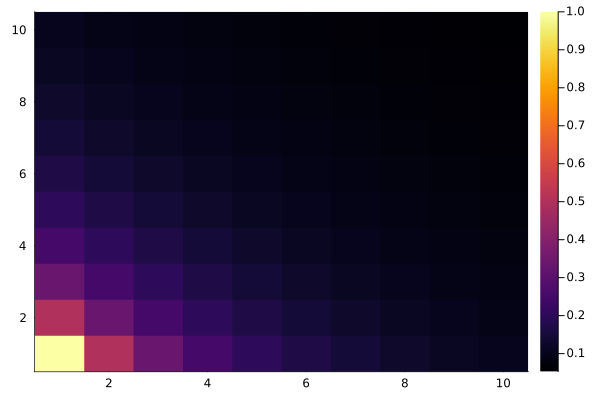

In [2]:
hilbertmatrix(n) = [1/(k+j-1) for j = 1:n, k=1:n]
hilbertmatrix(5)
heatmap(hilbertmatrix(10))

That is, the $H[k,j] = 1/(k+j-1)$. This is a famous example of matrix with rapidly decreasing singular values:

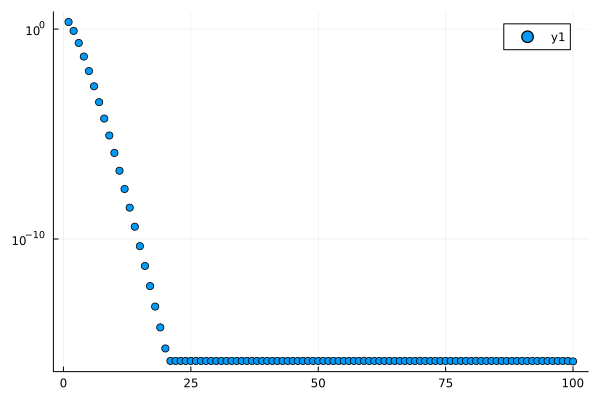

In [3]:
H = hilbertmatrix(100)
U,σ,V = svd(H)
scatter(σ; yscale=:log10)

Note numerically we typically do not get a exactly zero singular values so the rank is always
treated as $\min(m,n)$.
Because the singular values decay rapidly 
 we can approximate the matrix very well with a rank 20 matrix:

In [4]:
k = 20 # rank
Σ_k = Diagonal(σ[1:k])
U_k = U[:,1:k]
V_k = V[:,1:k]
opnorm(U_k * Σ_k * V_k' - H)

9.7119954320746e-16

Note that this can be viewed as a _compression_ algorithm: we have replaced a matrix with 
$100^2 = 10,000$ entries by two matrices and a vector with $4,000$ entries without losing
any information.
In the problem sheet we explore the usage of low rank approximation to smooth functions
and to compress images.